# Proyecto ML diagnóstico Diabetes apunte inspirado en "Neuronal Projects with python"

## Comprendiendo el problema de la diabetes

La diabetes es una condición médica crónica asociada con niveles elevados de azúcar en la sangre, lo que puede llevar a enfermedades cardiovasculares, accidentes cerebrovasculares, daño renal y daño a largo plazo en las extremidades y los ojos. Se estima que 415 millones de personas en el mundo padecen diabetes, causando hasta 5 millones de muertes anuales por complicaciones relacionadas con la diabetes. En Estados Unidos, es la séptima causa de muerte más alta.

### Tipos de diabetes

- **Diabetes Tipo 1**: Resulta de la incapacidad del cuerpo para producir insulina. Es menos común, representando aproximadamente el 5% de los casos de diabetes.
- **Diabetes Tipo 2**: Es la forma más prevalente y resulta de la resistencia gradual del cuerpo a la insulina. Está causada por el exceso de peso corporal, ejercicio irregular y una dieta deficiente. Puede prevenirse y revertirse si se diagnostica a tiempo.

Un desafío significativo para la detección temprana es que las etapas iniciales de la diabetes a menudo no presentan síntomas.

## El conjunto de datos de diabetes mellitus

Para este proyecto se utiliza un conjunto de datos de los indios Pima, proporcionado por el Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales y alojado por Kaggle. Los indios Pima, un grupo de nativos americanos en Arizona, tienen una alta incidencia de diabetes tipo 2 debido a una predisposición genética y cambios en su dieta hacia alimentos procesados. El conjunto de datos contiene mediciones diagnósticas de mujeres Pima y un indicador de si desarrollaron diabetes dentro de los cinco años de la medición inicial.

## Análisis exploratorio de datos

El análisis exploratorio se realiza para comprender el tipo de datos con los que estamos trabajando. Se importan las bibliotecas necesarias, se carga el conjunto de datos y se visualizan las primeras filas del mismo para obtener una visión inicial de los datos.

## Diagnóstico automatizado

El valor de la inteligencia artificial (IA) en la atención médica radica en aumentar las capacidades de los trabajadores de la salud y no en reemplazarlos. La IA puede apoyar en diversas áreas como diagnóstico automatizado, cirugías asistidas por robots, medicina de precisión y asistentes virtuales de salud. En este proyecto, se enfoca en el diagnóstico automatizado para predecir el riesgo de diabetes utilizando aprendizaje automático.

### Predicción de diabetes con redes neuronales

Si tenemos un conjunto de datos con mediciones vitales de pacientes y una etiqueta que indica el inicio de la diabetes, podemos entrenar una red neuronal para hacer predicciones sobre nuevos pacientes.

## IA en el sector salud

Además de predecir la diabetes, la IA está transformando el sector salud en general. Se espera un crecimiento significativo del mercado de la IA en salud, impulsado por la proliferación de empresas de tecnología. Por ejemplo, Apple ha desarrollado tecnologías portátiles que monitorean activamente la salud cardiovascular en tiempo real y predicen caídas significativas mediante el uso de acelerómetros y giroscopios.



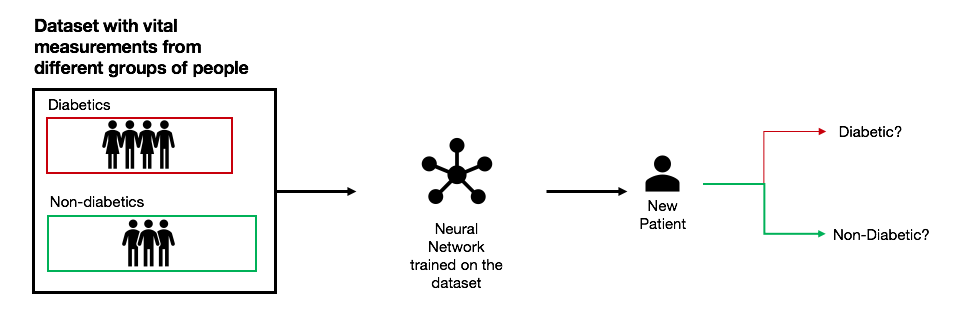

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df_diabetes = pd.read_csv('diabetes.csv')

In [127]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1. **Pregnancies**: Número de embarazos que ha tenido la paciente.
2. **Glucose**: Nivel de glucosa en sangre después de una prueba de tolerancia a la glucosa.
3. **BloodPressure**: Presión arterial diastólica (mm Hg).
4. **SkinThickness**: Grosor del pliegue cutáneo del tríceps (mm).
5. **Insulin**: Nivel de insulina en suero en dos horas (mu U/ml).
6. **BMI**: Índice de masa corporal, calculado como peso en kg dividido por altura en metros al cuadrado (kg/m²).
7. **DiabetesPedigreeFunction**: Función de pedigrí de diabetes, un valor basado en la historia familiar de diabetes y factores genéticos.
8. **Age**: Edad de la paciente (años).
9. **Outcome**: Variable de resultado que indica si la paciente ha desarrollado diabetes (1) o no (0).

Estas variables son utilizadas para analizar y predecir la probabilidad de que una paciente desarrolle diabetes tipo 2.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

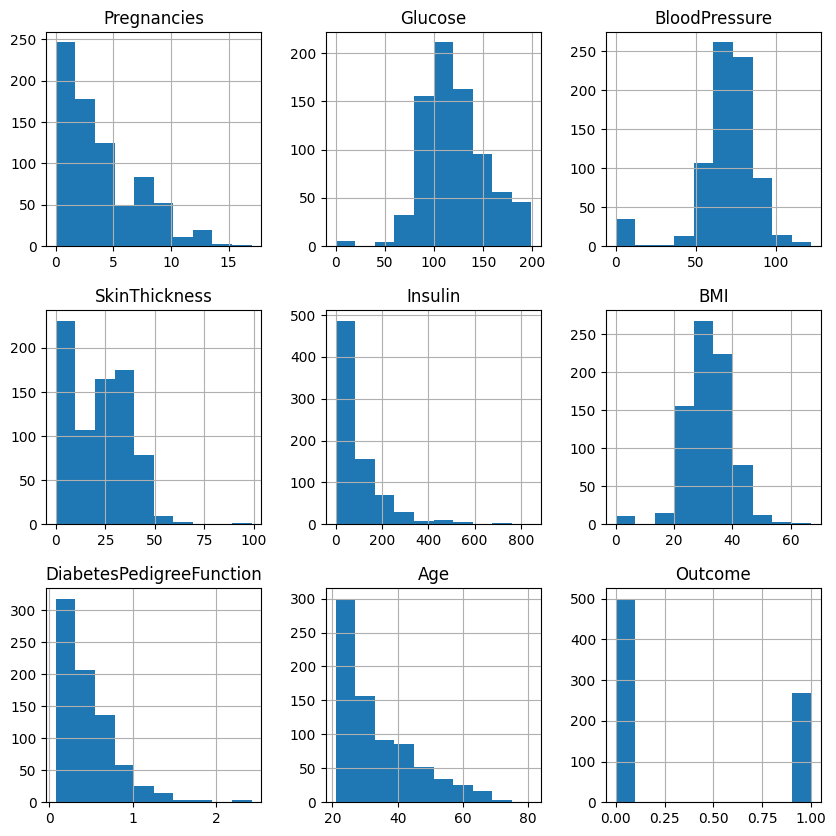

In [128]:
df_diabetes.hist(figsize=(10,10))

A continuación se presenta un análisis breve y conciso:

1. **Pregnancies**: La mayoría de las mujeres han tenido menos de 5 embarazos, con un claro sesgo hacia la izquierda, indicando que hay pocas mujeres con un número elevado de embarazos.
2. **Glucose**: La distribución es aproximadamente normal con una ligera asimetría hacia la derecha, concentrándose alrededor de los 100-150 mg/dL.
3. **BloodPressure**: La mayoría de los valores se concentran entre 60 y 80 mm Hg, con una distribución que también parece ligeramente sesgada hacia la derecha.
4. **SkinThickness**: Predomina una concentración de valores entre 0 y 50 mm, con una disminución gradual hacia valores más altos.
5. **Insulin**: Muestra una fuerte asimetría hacia la derecha, indicando que la mayoría de los valores son bajos (cerca de 0), con unos pocos valores extremadamente altos.
6. **BMI**: La distribución es aproximadamente normal, centrada alrededor de 30 kg/m², lo que indica que muchas mujeres tienen un índice de masa corporal en el rango de sobrepeso.
7. **DiabetesPedigreeFunction**: Presenta una distribución sesgada a la derecha, con la mayoría de los valores por debajo de 1.0, sugiriendo que pocas mujeres tienen un alto riesgo genético.
8. **Age**: La mayoría de las mujeres se encuentran en el rango de 20 a 40 años, con una disminución progresiva en los grupos de mayor edad.
9. **Outcome**: La variable de resultado muestra un claro desequilibrio, con muchas más mujeres sin diabetes (0) que con diabetes (1).

Las distribuciones de las variables muestran variabilidad y sesgos característicos que pueden influir en la modelización y predicción de la diabetes. La asimetría en las variables como insulina y grosor de la piel, así como el desequilibrio en el resultado, son aspectos importantes a considerar en el análisis y la construcción de modelos predictivos.

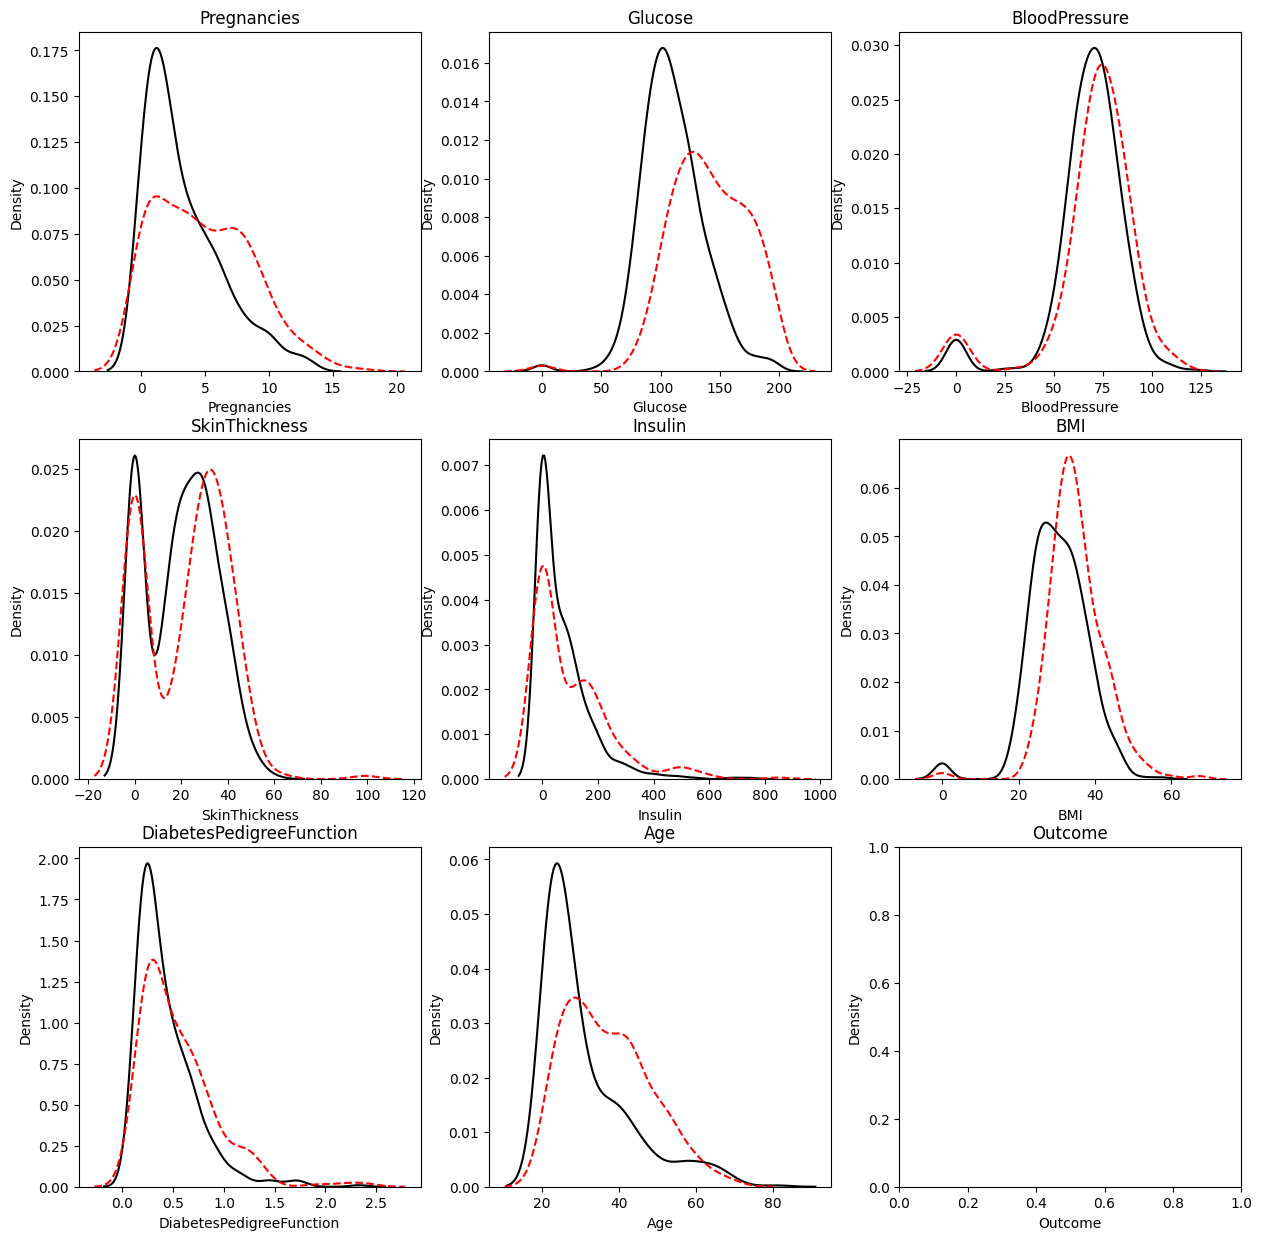

In [129]:
# Crear una figura con una matriz de subplots de 3x3 y tamaño 15x15
plt.subplots(3, 3, figsize=(15, 15))

# Iterar sobre las columnas del dataframe df_diabetes
for idx, col in enumerate(df_diabetes.columns):
    # Crear un subplot en la posición correspondiente
    ax = plt.subplot(3, 3, idx+1)
    # Configurar el tamaño de las etiquetas del eje y
    ax.yaxis.set_tick_params(labelsize=10)
    # Graficar la distribución de los valores de la columna para los casos sin diabetes
    sns.kdeplot(df_diabetes.loc[df_diabetes.Outcome == 0][col], ax=ax, linestyle='-', color='k', label='No diabetes', warn_singular=False)
    # Graficar la distribución de los valores de la columna para los casos con diabetes
    sns.kdeplot(df_diabetes.loc[df_diabetes.Outcome == 1][col], ax=ax, linestyle='--', color='r', label='Diabetes', warn_singular=False)
    # Establecer el título del subplot como el nombre de la columna
    ax.set_title(col)

Estas gráficas de densidad comparan las distribuciones de las variables del conjunto de datos entre las mujeres con diabetes (línea roja discontinua) y sin diabetes (línea negra continua):

1. **Pregnancies**: Las mujeres con diabetes tienden a tener un número ligeramente mayor de embarazos en comparación con aquellas sin diabetes.
2. **Glucose**: Existe una diferencia notable en la distribución, donde las mujeres con diabetes tienen niveles de glucosa más altos en comparación con aquellas sin diabetes.
3. **BloodPressure**: La distribución de la presión arterial es bastante similar entre ambos grupos, aunque las mujeres con diabetes muestran una ligera tendencia a tener presiones más altas.
4. **SkinThickness**: La distribución del grosor de la piel muestra diferencias, con mujeres con diabetes teniendo un rango más amplio de valores, incluyendo algunos valores más altos.
5. **Insulin**: Las mujeres con diabetes tienden a tener niveles más altos de insulina en comparación con aquellas sin diabetes.
6. **BMI**: El índice de masa corporal es mayor en mujeres con diabetes, indicando una posible correlación entre el IMC y la diabetes.
7. **DiabetesPedigreeFunction**: Las mujeres con diabetes muestran un mayor valor en la función de pedigrí de diabetes, lo que sugiere una influencia genética más fuerte.
8. **Age**: La edad de las mujeres con diabetes tiende a ser mayor en comparación con aquellas sin diabetes, indicando que la diabetes es más prevalente en grupos de mayor edad.
9. **Outcome**: No se muestra una gráfica de densidad aquí, pero el análisis de los histogramas previos muestra un desequilibrio significativo entre los resultados.

Las gráficas de densidad revelan diferencias clave en las variables entre los grupos con y sin diabetes, siendo particularmente notables en los niveles de glucosa, insulina y la función de pedigrí de diabetes. Estas diferencias son cruciales para la predicción y análisis de la diabetes en modelos de aprendizaje automático.

**No necesitamos preocuparnos por la distribución de clases en nuestros datos de entrenamiento para este proyecto, ya que no vamos a desplegar nuestro clasificador en el mundo real. Sin embargo, es una buena práctica para los científicos de datos y los ingenieros de aprendizaje automático verificar la distribución de clases en los datos de entrenamiento, para asegurar un buen rendimiento del modelo en el mundo real.**

# Procesamiento de Datos

In [131]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [132]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [133]:
print('Numero de filas con 0 valores para cada variable')
for col in df_diabetes.columns:
    print(col, df_diabetes.loc[df_diabetes[col] == 0].shape[0])
    missing_values = df_diabetes.loc[df_diabetes[col] == 0].shape[0]
    

Numero de filas con 0 valores para cada variable
Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [134]:
df_diabetes['Glucose'] = df_diabetes['Glucose'].replace(0, np.nan)
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].replace(0, np.nan)
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].replace(0, np.nan)
df_diabetes['Insulin'] = df_diabetes['Insulin'].replace(0, np.nan)
df_diabetes['BMI'] = df_diabetes['BMI'].replace(0, np.nan)

In [135]:
print('Numero de filas con 0 valores para cada variable')
for col in df_diabetes.columns:
    print(col, df_diabetes.loc[df_diabetes[col] == 0].shape[0])
    missing_values = df_diabetes.loc[df_diabetes[col] == 0].shape[0]
    

Numero de filas con 0 valores para cada variable
Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [136]:
df_diabetes['Glucose'] = df_diabetes['Glucose'].fillna(df_diabetes['Glucose'].mean())
df_diabetes['BloodPressure'] = df_diabetes['BloodPressure'].fillna(df_diabetes['BloodPressure'].mean())
df_diabetes['SkinThickness'] = df_diabetes['SkinThickness'].fillna(df_diabetes['SkinThickness'].mean())
df_diabetes['Insulin'] = df_diabetes['Insulin'].fillna(df_diabetes['Insulin'].mean())
df_diabetes['BMI'] = df_diabetes['BMI'].fillna(df_diabetes['BMI'].mean())

In [137]:
from sklearn import preprocessing

In [138]:
df_diabetes_scaled = preprocessing.scale(df_diabetes)

In [139]:
df_diabetes_scaled

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [140]:
df_diabetes_scaled = pd.DataFrame(df_diabetes_scaled, columns=df_diabetes.columns)

In [141]:
df_diabetes_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,2.877840e-01,0.064409,-0.908682,2.532136,-0.732120
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-3.345079e-16,0.632039,-0.398282,-0.531023,-0.732120
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-5.125386e-01,-0.910750,-0.685193,-0.275760,-0.732120
766,-0.844885,0.141808,-1.026200,8.087936e-16,-3.345079e-16,-0.343120,-0.371101,1.170732,1.365896


In [142]:
df_diabetes_scaled['Outcome'] = df_diabetes['Outcome']

df_diabetes=df_diabetes_scaled

In [143]:
df_diabetes.describe().loc[['mean', 'std', 'max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [144]:
from sklearn.model_selection import train_test_split

X = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes['Outcome']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

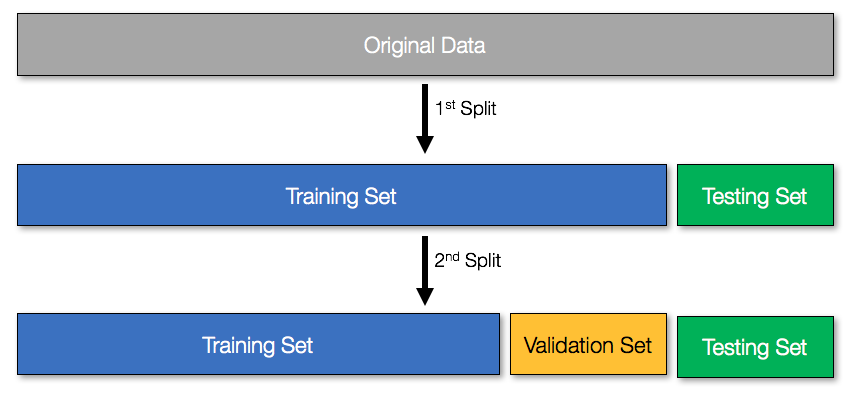

In [147]:
from keras.models import Sequential

In [148]:
model = Sequential()

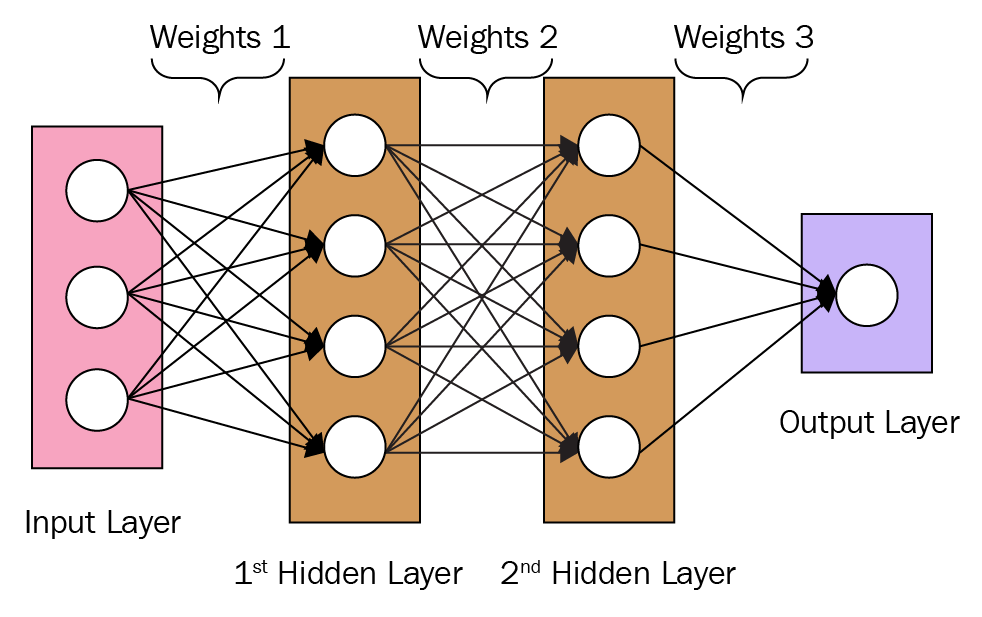

In [149]:
from keras.layers import Dense

model.add(Dense(units=32, activation='relu', input_shape=(8,)))

c:\Users\JavierVelosoRios\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


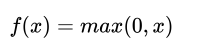

In [150]:
model.add(Dense(units=16, activation='relu'))

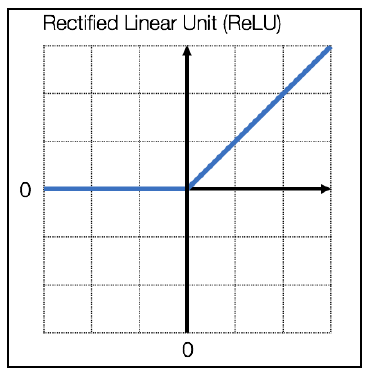

In [151]:
model.add(Dense(1, activation='sigmoid'))

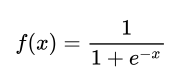

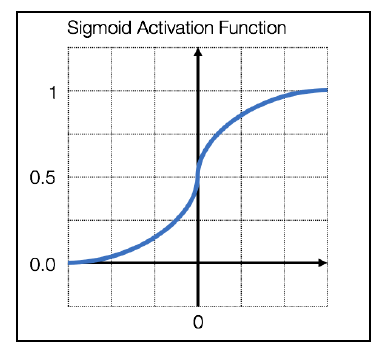

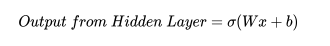

In [152]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [153]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

In [154]:
model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5853 - loss: 0.6929 - val_accuracy: 0.7561 - val_loss: 0.5879
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6841 - loss: 0.6161 - val_accuracy: 0.7561 - val_loss: 0.5378
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7324 - loss: 0.5496 - val_accuracy: 0.7724 - val_loss: 0.5039
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7674 - loss: 0.5047 - val_accuracy: 0.7642 - val_loss: 0.4828
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7624 - loss: 0.4832 - val_accuracy: 0.7886 - val_loss: 0.4691
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7573 - loss: 0.4624 - val_accuracy: 0.7886 - val_loss: 0.4627
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7428 - loss: 0.4698 - val_accuracy: 0.7886 - val_loss: 0.4589
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 0.4601 - val_accuracy: 0.7886 - v

In [155]:
score = model.evaluate(X_test, y_test)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6669 - loss: 0.8594 


# Matriz de confusión

La matriz de confusión es una herramienta visual útil que analiza los verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos de nuestro modelo. Más allá de una simple métrica de precisión, la matriz de confusión nos ayuda a comprender el rendimiento del modelo.

## Definiciones:
- **Verdadero Negativo (True Negative)**: La clase real es negativa (sin diabetes) y el modelo predijo negativo (sin diabetes).
- **Falso Positivo (False Positive)**: La clase real es negativa (sin diabetes), pero el modelo predijo positivo (diabetes).
- **Falso Negativo (False Negative)**: La clase real es positiva (diabetes), pero el modelo predijo negativo (sin diabetes).
- **Verdadero Positivo (True Positive)**: La clase real es positiva (diabetes) y el modelo predijo positivo (diabetes).

## Importancia:
- **Falsos Positivos y Falsos Negativos**: Queremos que los números de falsos positivos y falsos negativos sean lo más bajos posible, ya que afectan directamente la efectividad del modelo en la clasificación correcta de los casos.

La matriz de confusión proporciona una visión detallada del rendimiento del modelo, permitiendo identificar y entender mejor los errores de predicción, lo cual es crucial para mejorar la precisión del modelo.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


Text(50.72222222222221, 0.5, 'Actual')

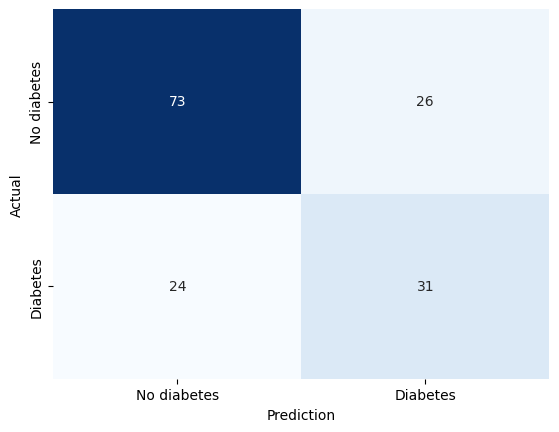

In [156]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predecir las etiquetas del conjunto de prueba
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calcular la matriz de confusión
c_matrix = confusion_matrix(y_test, y_test_pred)

# Crear un mapa de calor para visualizar la matriz de confusión
ax = sns.heatmap(c_matrix, annot=True, fmt="d", xticklabels=['No diabetes', 'Diabetes'], yticklabels=['No diabetes', 'Diabetes'], cmap="Blues", cbar=False)

# Etiquetar el eje x como "Predicción"
ax.set_xlabel("Prediction")

# Etiquetar el eje y como "Actual"
ax.set_ylabel("Actual")

## Curva ROC 

Para tareas de clasificación, es importante analizar la curva ROC para evaluar nuestro modelo. La curva ROC es un gráfico que muestra la Tasa de Verdaderos Positivos (TPR) en el eje y y la Tasa de Falsos Positivos (FPR) en el eje x.

#### Definiciones:
- **TPR (Tasa de Verdaderos Positivos)**: Proporción de positivos reales correctamente identificados.
- **FPR (Tasa de Falsos Positivos)**: Proporción de negativos reales incorrectamente identificados como positivos.

Al analizar la curva ROC, observamos el área bajo la curva (AUC) para evaluar el rendimiento del modelo:
- **AUC alta**: El modelo diferencia bien entre las clases.
- **AUC baja**: El modelo hace predicciones incorrectas con frecuencia.
- **Curva ROC en la diagonal**: El modelo no tiene capacidad de diferenciación, es decir, sus predicciones son aleatorias.

La curva ROC y el AUC nos ayudan a entender qué tan bien el modelo está clasificando correctamente las diferentes clases.

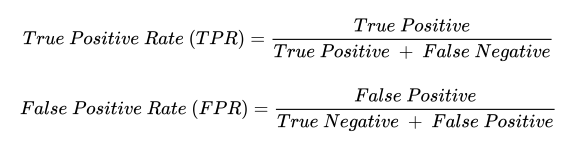

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_pred_probs = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step


Text(0, 0.5, 'True Positive Rate')

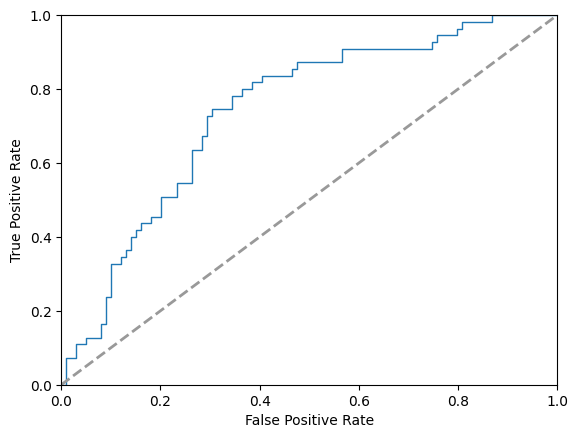

In [158]:
plt.plot(fpr, tpr, lw=1)
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random', lw=2) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## Análisis de la Curva ROC

La curva ROC presentada muestra la relación entre la Tasa de Verdaderos Positivos (TPR) y la Tasa de Falsos Positivos (FPR) de un modelo de clasificación.

### Observaciones Clave:
1. **Forma de la Curva**: La curva ROC se encuentra por encima de la diagonal gris (línea de no discriminación), lo que indica que el modelo tiene capacidad para diferenciar entre las clases positivas y negativas.
2. **Área Bajo la Curva (AUC)**: Aunque no se proporciona el valor exacto del AUC, visualmente parece ser considerablemente mayor que 0.5, lo que sugiere un buen desempeño del modelo. Un AUC de 0.5 indicaría un modelo sin capacidad de discriminación (predicciones al azar).
3. **Rendimiento del Modelo**: La curva muestra un buen equilibrio entre TPR y FPR. Un modelo ideal tendría una curva que se acerca lo más posible a la esquina superior izquierda, indicando altas tasas de verdaderos positivos y bajas tasas de falsos positivos.

La curva ROC sugiere que el modelo de clasificación tiene un buen rendimiento en la diferenciación de las clases, aunque siempre hay espacio para mejoras adicionales en la precisión y reducción de errores.

# Mejoras Adicionales

Podemos mejorar el rendimiento de nuestro modelo aumentando la precisión y reduciendo las tasas de falsos negativos y falsos positivos. Las limitaciones en el rendimiento suelen deberse a la falta de características sólidas en el conjunto de datos más que a la complejidad de la red neuronal.

#### Ingeniería de Características

La ingeniería de características implica crear nuevas características utilizando el conocimiento del dominio. Esto es crucial en la ciencia de datos, ya que puede mejorar significativamente el rendimiento del modelo. Sin embargo, debe hacerse con cuidado para evitar agregar ruido que afecte negativamente al modelo.

#### Selección de Características

La selección de características consiste en eliminar características ruidosas que no son predictores fuertes. Los árboles de decisión son útiles para esto, ya que pueden clasificar y eliminar características no importantes. Aunque no se implementó en este proyecto, se verá en capítulos posteriores en problemas más complejos.

Tanto la ingeniería de características como la selección de características son técnicas importantes para mejorar el rendimiento de los modelos de aprendizaje automático.

# Resumen

En este ejemplo, hemos diseñado e implementado una MLP (Perceptrón Multicapa) capaz de predecir la aparición de diabetes con una precisión alta.

Primero realizamos un análisis exploratorio de datos, examinando la distribución de cada variable y la relación entre cada variable y la variable objetivo. Luego, preprocesamos los datos para eliminar datos faltantes y estandarizamos las variables para que tuvieran una media de 0 y una desviación estándar de 1. Finalmente, dividimos los datos originales aleatoriamente en un conjunto de entrenamiento, un conjunto de validación y un conjunto de prueba.

Posteriormente, analizamos la arquitectura de la MLP utilizada, que consta de 2 capas ocultas, con 32 nodos en la primera capa oculta y 16 nodos en la segunda. Implementamos esta MLP en Keras usando el modelo secuencial, que nos permite apilar capas una sobre otra. Entrenamos nuestra MLP con el conjunto de entrenamiento, utilizando el algoritmo de optimización Adam para ajustar los pesos y sesgos de la red neuronal durante 200 iteraciones, mejorando gradualmente la precisión del modelo.

Finalmente, evaluamos nuestro modelo utilizando métricas como la precisión del conjunto de prueba, la matriz de confusión y la curva ROC. Observamos la importancia de métricas como los falsos negativos y falsos positivos, especialmente para un clasificador que predice la aparición de diabetes.

Esto concluye el capítulo sobre el uso de una MLP simple para predecir la aparición de diabetes.

# Modelos Clásicos VS Redes Neuronales

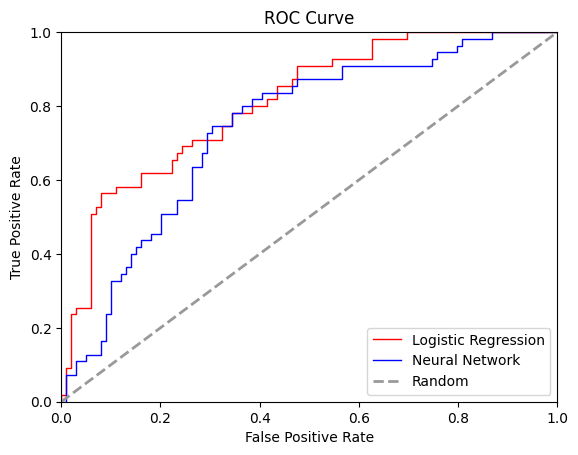

In [159]:
# crear un modelo de regresión logística para comparar con la red neuronal
from sklearn.linear_model import LogisticRegression

# Inicializar el modelo de regresión logística con un máximo de 200 iteraciones
log_reg = LogisticRegression(max_iter=200)

# Entrenar el modelo de regresión logística con los datos de entrenamiento
log_reg.fit(X_train, y_train)

# Obtener las probabilidades predichas para el conjunto de prueba
y_test_pred_probs_log_reg = log_reg.predict_proba(X_test)[:,1]

# Calcular las tasas de falsos positivos y verdaderos positivos para la curva ROC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_test_pred_probs_log_reg)

# Graficar la curva ROC para la regresión logística
plt.plot(fpr_log_reg, tpr_log_reg, lw=1, color='red', label='Logistic Regression')
# Graficar la curva ROC para la red neuronal
plt.plot(fpr, tpr, lw=1, color='blue', label='Neural Network')
# Graficar la línea de referencia para un clasificador aleatorio
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random', lw=2)
# Establecer los límites del eje x
plt.xlim([0.0, 1.0])
# Establecer los límites del eje y
plt.ylim([0.0, 1.0])
# Etiqueta del eje x
plt.xlabel('False Positive Rate')
# Etiqueta del eje y
plt.ylabel('True Positive Rate')
# Título del gráfico
plt.title('ROC Curve')
# Mostrar la leyenda en la esquina inferior derecha
plt.legend(loc="lower right")

# Calcular y mostrar el AUC para la red neuronal
roc_auc_score(y_test, y_test_pred_probs)

# Calcular y mostrar el AUC para la regresión logística
roc_auc_score(y_test, y_test_pred_probs_log_reg)

# Mostrar el gráfico
plt.show()

## Interpretación del Gráfico ROC

Este gráfico ROC compara el rendimiento de un modelo de regresión logística (línea roja) con el de una red neuronal (MLP) (línea azul).

### Observaciones Clave:
1. **Curva de Regresión Logística (Rojo)**:
   - La curva se encuentra consistentemente por encima de la línea diagonal de no discriminación (gris), lo que indica un rendimiento superior al azar.
   - La curva se acerca más a la esquina superior izquierda en comparación con la red neuronal, lo que sugiere que la regresión logística tiene una mejor capacidad de discriminación en esta comparación específica.

2. **Curva de Red Neuronal (Azul)**:
   - La curva también está por encima de la línea diagonal, indicando un rendimiento mejor que el azar.
   - Sin embargo, en varios puntos, la curva de la red neuronal está por debajo de la curva de la regresión logística, sugiriendo que, en esta comparación, la regresión logística puede estar funcionando mejor en términos de Tasa de Verdaderos Positivos (TPR) y Tasa de Falsos Positivos (FPR).

3. **Área Bajo la Curva (AUC)**:
   - Aunque no se proporciona el valor exacto del AUC, visualmente parece que la regresión logística podría tener un AUC ligeramente mayor, lo que indica un mejor rendimiento general en esta tarea de clasificación.

### Conclusión:
En este caso, el modelo de regresión logística parece tener un mejor rendimiento en la clasificación de los datos en comparación con la red neuronal, como se observa en la curva ROC. Sin embargo, ambos modelos tienen un rendimiento significativamente mejor que el azar (línea diagonal), lo que los hace útiles para la tarea de predicción de diabetes.